In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('..'))

plt.rcParams.update({'font.size': 12})
from hola.tune import Tuner

import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

np.random.seed(4)

In [2]:
N = 60

params_config = {
    "x1":{
        "min":0.0,
        "max":1.0
    },
    "x2":{
        "min":0.0,
        "max":1.0
    }
}

objectives_config = {
    "f":{
        "target":1.0,
        "limit":0.0,
        "priority":1.0
    }
}

In [3]:
#k1 = 2
#k2 = 2

#def func(x1,x2):
#    return 0.5*(2*(x1 + x2) + np.sin(2*np.pi*k1*x1) + np.sin(2*np.pi*k2*x2))
# a = 1
# b = 5
# def func(x1,x2):
#     return -((a-x1)**2+b*(x2-x1**2)**2)

# a = 1.5
# def func(x1,x2):
#     return np.exp(-(x1*x2-a)**2-(x2-a)**2)

a1 = 1.25
a2 = 4
mu = np.array([0.3,0.25])
sig = 1.0
def func(x1,x2):
    z = np.array([x1**a1,x2**a2])
    s = z-mu
    return np.exp(-(s.T.dot(s)/(0.015*x1*x2)))

In [4]:
x1 = np.linspace(0,1,N)
x2 = np.linspace(0,1,N)

f = np.zeros((N,N))

for i,x in enumerate(x1):
    for j,y in enumerate(x2):
        f[i,j] = func(x,y)

/var/folders/x3/m3dk89cj2kz39h6hck1t4m840000gp/T/ipykernel_40149/3290472698.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-(s.T.dot(s)/(0.015*x1*x2)))


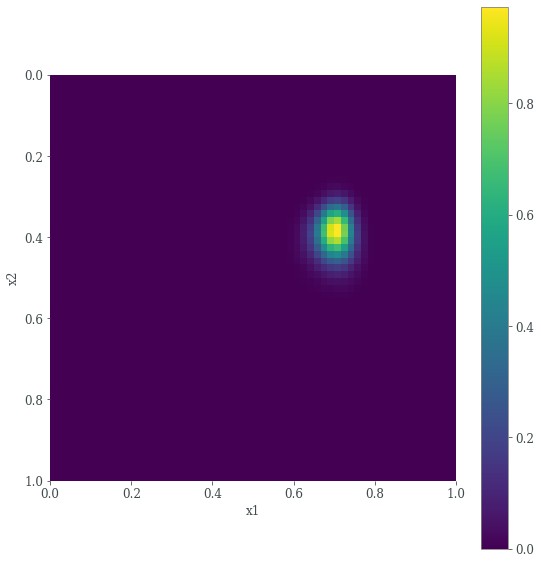

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(f, extent=[0,1,1,0])
plt.xlabel('x1')
plt.ylabel('x2')
#plt.title('Portfolio IR')
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
def run(x1, x2):
    
    f = func(x1,x2) 
    
    return {"f":f}

In [7]:
tuner = Tuner(params_config, objectives_config, min_samples=20)

TypeError: __init__() got an unexpected keyword argument 'min_samples'

In [ ]:
results = tuner.tune(run, num_runs=200, n_jobs=1)

In [ ]:
tuner.get_best_params()

In [ ]:
tuner.get_best_scores()

In [ ]:
leaderboard = tuner.get_leaderboard()

In [8]:
tuner_uniform = Tuner(params_config, objectives_config, min_samples=1000)
tuner_uniform.tune(run, num_runs=200, n_jobs=1)
ldr_uniform = tuner_uniform.get_leaderboard()

TypeError: __init__() got an unexpected keyword argument 'min_samples'

NameError: name 'leaderboard' is not defined

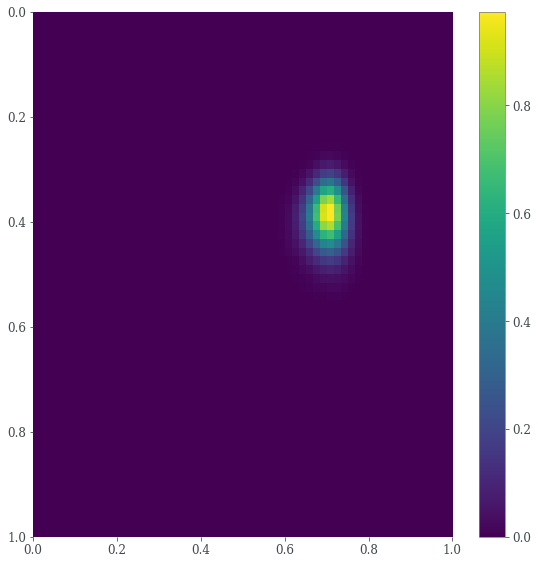

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(f, extent=[0,1,1,0],aspect='auto')
plt.colorbar()
plt.grid(False)


plt.plot(leaderboard['x2'],leaderboard['x1'], linestyle='', marker='o', color='r')

plt.show()

In [10]:
leaderboard.iloc[:10]

NameError: name 'leaderboard' is not defined

In [11]:
plt.figure(figsize=(8,6))
#plt.plot(leaderboard['run'],leaderboard['f'], marker='o', linestyle='')
plt.plot(leaderboard.sort_values('run')['run'],leaderboard.sort_values('run')['f'].expanding().max(), 
         marker='o', linestyle='', color='r', label='LAHO')
plt.plot(ldr_uniform.sort_values('run')['run'],ldr_uniform.sort_values('run')['f'].expanding().max(),
         marker='o', linestyle='', color='b', label="uniform")
plt.ylim(0,1.1)
plt.legend()
plt.xlabel('run')
plt.ylabel('best found value')
plt.show()

NameError: name 'leaderboard' is not defined

<Figure size 576x432 with 0 Axes>

In [12]:
leaderboard['z1'] = (leaderboard['x1']*N).astype(int)
leaderboard['z2'] = (leaderboard['x2']*N).astype(int)

NameError: name 'leaderboard' is not defined

In [38]:
leaderboard = leaderboard.sort_values('run')
leaderboard

,run,x1,x2,f,score,z1,z2
173,0,0.967030,0.547232,6.861224e-26,1.000000,58,32
166,1,0.714816,0.697729,3.806021e-08,1.000000,42,41
174,2,0.976274,0.006230,0.000000e+00,1.000000,58,0
157,3,0.434792,0.779383,3.547427e-02,0.964526,26,46
175,4,0.862993,0.983401,2.154100e-26,1.000000,51,59
...,...,...,...,...,...,...,...
80,195,0.433988,0.717278,5.321257e-01,0.467874,26,43
82,196,0.382613,0.741633,5.229357e-01,0.477064,22,44
26,197,0.384334,0.723602,8.680294e-01,0.131971,23,43
67,198,0.420114,0.727464,5.970026e-01,0.402997,25,43


/Users/gmaher/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


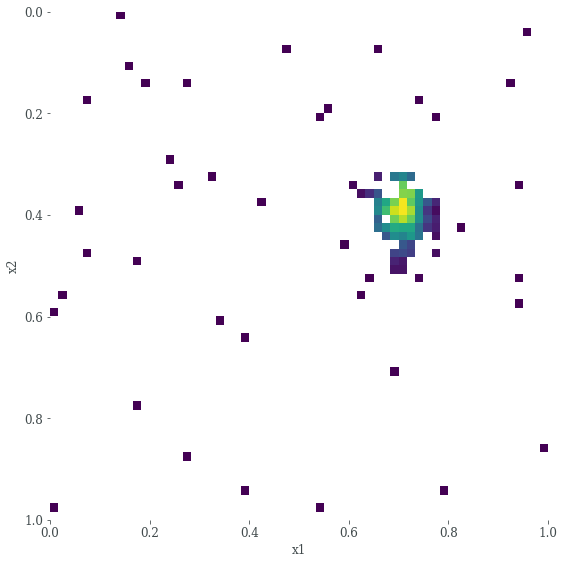

In [39]:
points = leaderboard[['z1','z2']].values
scores = leaderboard['f'].values

S = np.zeros((N,N))
S[:,:] = None

ims = []

fig = plt.figure(figsize=(8,8))
plt.grid(False)
#plt.title("Portfolio IR")
plt.xlabel("x1")
plt.ylabel("x2")
#plt.colorbar()

for i in range(len(scores)):
    p = points[i]
    S[p[0],p[1]] = scores[i]
    
    im = plt.imshow(S, extent=[0,1,1,0],aspect='auto',vmin=0,vmax=1)
    ims.append([im])
    
ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=0, repeat=True)

writer = PillowWriter(fps=50)
ani.save("./results/demo.gif", writer=writer)

plt.show()

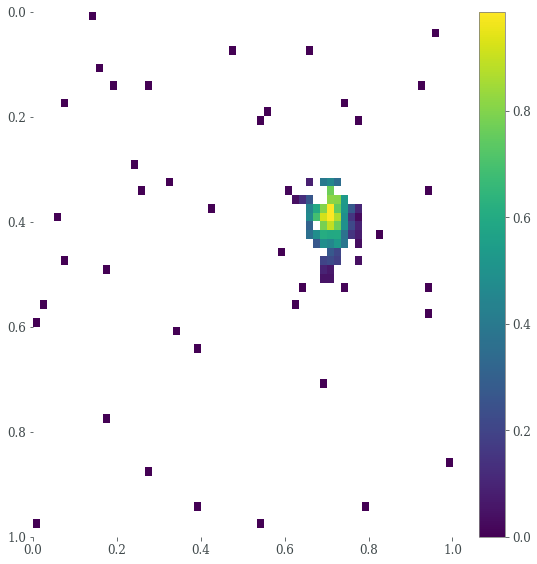

In [40]:
plt.figure(figsize=(8,8))
plt.imshow(S, extent=[0,1,1,0],aspect='auto')
plt.colorbar()
plt.grid(False)
plt.show()

In [41]:
len(ims)

200

In [42]:
ims[0]